In [1]:
import os
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'gray' # grayscale looks better

from IPython.display import Image, display, SVG, clear_output, HTML
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [38]:
H = 28
W = 28

# Create HxW grid graph
G = nx.grid_2d_graph(H, W)

# Set all weights to 1
for edge in G.edges:
    G.edges[edge]['weight'] = 0.5
    
G.add_edges_from([
    ((x, y), (x+1, y+1))
    for x in range(W-1)
    for y in range(H-1)
] + [
    ((x+1, y), (x, y+1))
    for x in range(W-1)
    for y in range(H-1)
], weight=0.5)

# Add master node here, connect to 
G.add_node((-1, -1), pos=(-1, -1), label='master')
G.add_edges_from([
    ((x, y), (-1, -1))
    for x in range(W)
    for y in range(H)
], weight=0.5)

In [39]:
# 
def draw_grid(G, arr=None, ax=None):
    #assert len(G) == len(arr.flatten())
    pos = dict(zip(G,G))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    else:
        fig = None
    
    node_color = []
    node_label = {}
    # for i, n in enumerate(list(G.nodes)[:-1]):
    #     #node_color.append(G.nodes[k].get('color', 'green'))
    #     node_color.append(arr.flatten()[i])
    #     node_label[n] = G.nodes[n].get('label', n)

    edge_color = []
    edge_width = []
    for e in G.edges():
        edge_color.append(G.edges[e].get('color', 'blue'))
        edge_width.append(G.edges[e].get('width', 1))

    nx.draw_networkx_edges(G, pos=pos, edge_color=edge_color, alpha=0.50, ax=ax, width=edge_width)
    # nx.draw_networkx_nodes(G, pos=pos, node_color=node_color.append(0.5), alpha=0.75, ax=ax, node_shape='s', node_size=100)
    fig.tight_layout()
    ax.axis('off')
    ax.autoscale()
    

5


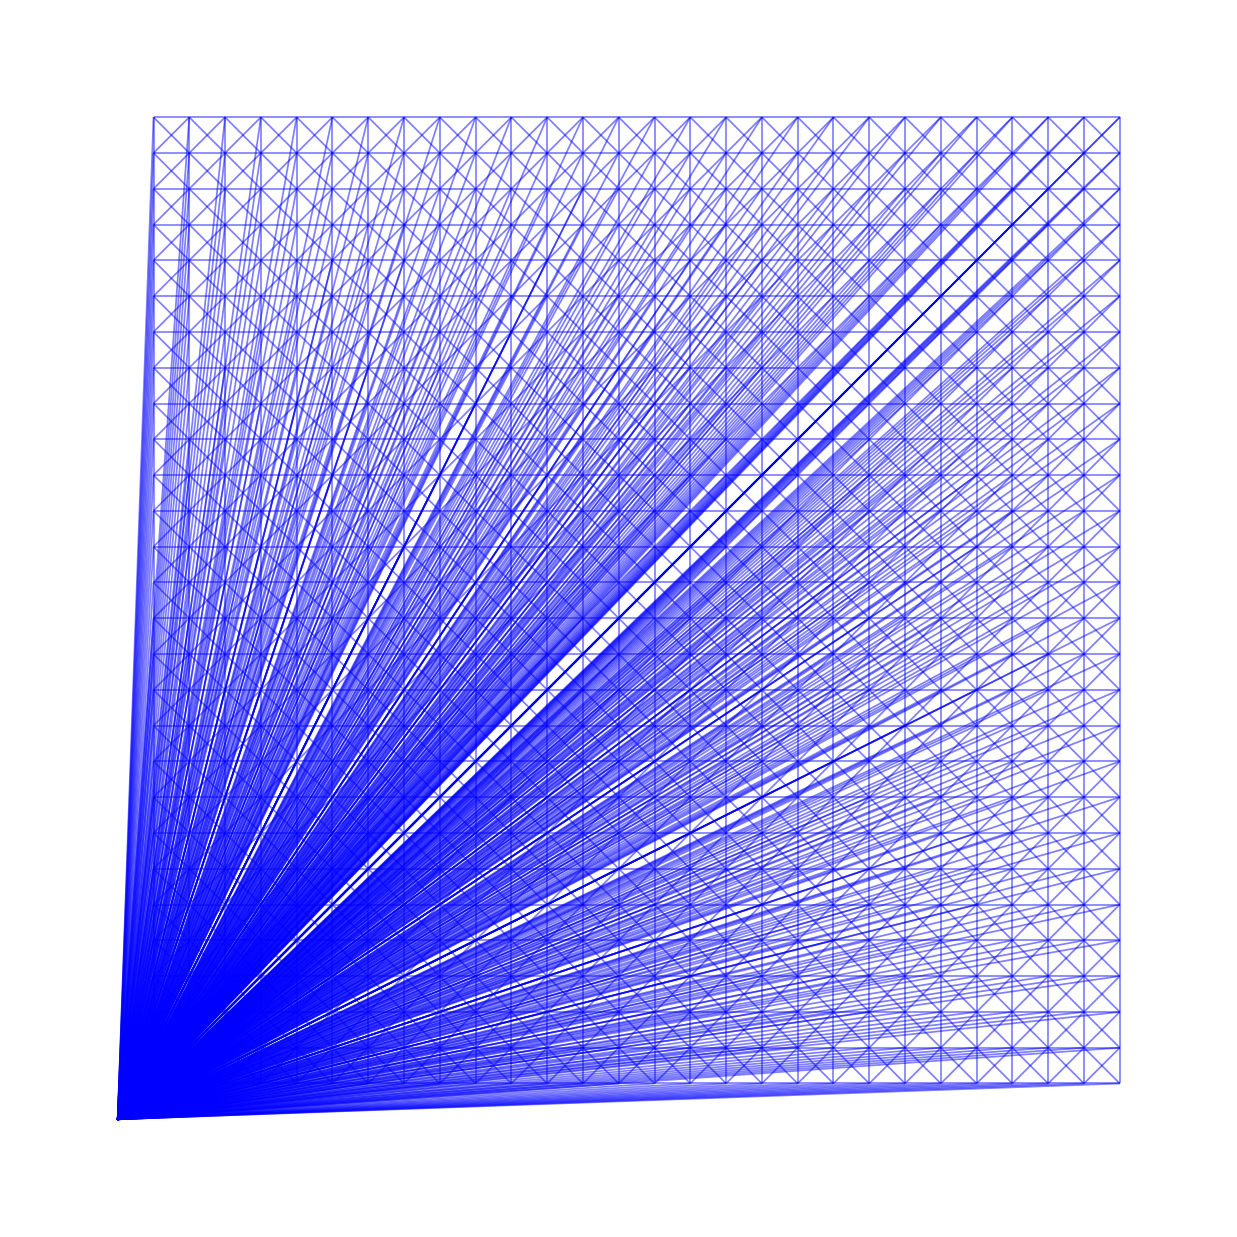

In [40]:
k=15
print(y_test[k])
draw_grid(G, np.rot90(X_test[k,:,:], -1))

In [41]:
print(len(G.nodes()))
print(len(G.edges()))

785
3754


In [42]:
G.number_of_nodes()

785

In [43]:
G.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (4, 0), (4, 1), (4, 2)